## Q learning formule de Bellman

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [54]:
# Initialisation de l'environnement (grille)
grid_size = 10
env = np.zeros((grid_size, grid_size))  # Grille vide
goal = (9, 9)

# Ajout d'obstacles
obstacles = [(0, 5), (0, 6), (3, 3), (3, 4), (6, 5), (6, 6)]
for obs in obstacles:
    env[obs] = 1


# Afficher la grille
env

array([[0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [55]:
# Initialisation des paramètres
actions = ['H', 'B', 'G', 'D']  # Haut, Bas, Gauche, Droite
#q_table = np.zeros((grid_size, grid_size))  # Q-valeurs
q_table = np.zeros((grid_size, grid_size, len(actions))) 
alpha = 0.1  # Taux d'apprentissage
gamma = 0.9  # Taux de discount
epsilon = 0.1  # Exploration/exploitation
q_table.shape

(10, 10, 4)

In [95]:
# Définir les récompenses
def get_reward(state):
    x, y = state
    if env[x, y] == 1:  # Obstacle
        return -10
    elif (x, y) == (9, 9):  # Objectif
        return 10 
    else:
        return 1 / (abs(x - goal[0]) + abs(y - goal[1]) )

# Déplacer le robot
def take_action(state, action):
    x, y = state
    
    # Restriction pour la position (0, 0)
    if state == (0, 0):
        if action == 'B':  # Bas
            x += 1
        elif action == 'D':  # Droite
            y += 1
        # Les autres actions ne sont pas permises, rester dans l'état actuel
        return (x, y)
    
    
    if action == 'H' and x > 0:
        x -= 1
    elif action == 'B' and x < grid_size - 1:
        x += 1
    elif action == 'G' and y > 0:
        y -= 1
    elif action == 'D' and y < grid_size - 1:
        y += 1
    return (x, y)


def q_learning(episodes):
    for episode in range(episodes):
        state = (0, 0)
        while state != (9, 9):
            # Choisir une action
            if np.random.uniform(0, 1) < epsilon:
                action_index = np.random.choice(len(actions))  # Exploration
            else:
                action_index = np.argmax(q_table[state[0], state[1], :])  # Exploitation
            
            action = actions[action_index]
            next_state = take_action(state, action)
            reward = get_reward(next_state)
            
            # Mettre à jour la Q-valeur
            q_table[state[0], state[1], action_index] += alpha * (
                reward + gamma * np.max(q_table[next_state[0], next_state[1], :]) - 
                q_table[state[0], state[1], action_index]
            )
            
            state = next_state
    return q_table

# Q-learning
episodes = 100
q_table = q_learning(episodes)

In [96]:
# Trouver un chemin valide
valid_path = []
state = (0, 0)

while state != (9, 9):
    valid_path.append(state)
    action_index = np.argmax(q_table[state[0], state[1], :])
    action = actions[action_index]
    next_state = take_action(state, action)
    
    # Vérifiez si l'état suivant est valide (pas un obstacle)
    if env[next_state[0], next_state[1]] == 1:
        print("Erreur : chemin passe par un obstacle !")
        break
    state = next_state

valid_path.append((9, 9))  # Ajouter l'objectif
print("Chemin valide :", valid_path)


Chemin valide : [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (1, 5), (2, 5), (2, 6), (2, 7), (1, 7), (1, 8), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]


In [97]:
def visualize_path(ax,env, path,title):
    grid_size = env.shape[0]
    
    # Dessiner les cases
    for x in range(grid_size):
        for y in range(grid_size):
            if env[x, y] == 1:  # Obstacle
                rect = patches.Rectangle((y, grid_size - x - 1), 1, 1, facecolor='black')
            else:  # Case valide
                rect = patches.Rectangle((y, grid_size - x - 1), 1, 1, edgecolor='gray', facecolor='white')
            ax.add_patch(rect)
    
    # Dessiner le chemin
    for i in range(len(path) - 1):
        start = path[i]
        end = path[i + 1]
        # Matplotlib dessine en coordonnées inversées (x devient y et y devient x)
        ax.plot(
            [start[1] + 0.5, end[1] + 0.5], 
            [grid_size - start[0] - 0.5, grid_size - end[0] - 0.5], 
            color='blue', linewidth=2
        )
    
    # Marquer le point de départ et l'objectif
    start = path[0]
    goal = path[-1]
    ax.plot(start[1] + 0.5, grid_size - start[0] - 0.5, 'go', markersize=10, label="Départ")  # Vert
    ax.plot(goal[1] + 0.5, grid_size - goal[0] - 0.5, 'ro', markersize=10, label="Objectif")  # Rouge
    
    # Configurer les axes
    ax.set_xlim(0, grid_size)
    ax.set_ylim(0, grid_size)
    ax.set_xticks(range(grid_size))
    ax.set_yticks(range(grid_size))
    
    ax.set_yticklabels(range(grid_size - 1, -1, -1))
    
    ax.set_aspect('equal')
    ax.grid(True)
    ax.legend()
    ax.set_title(title)


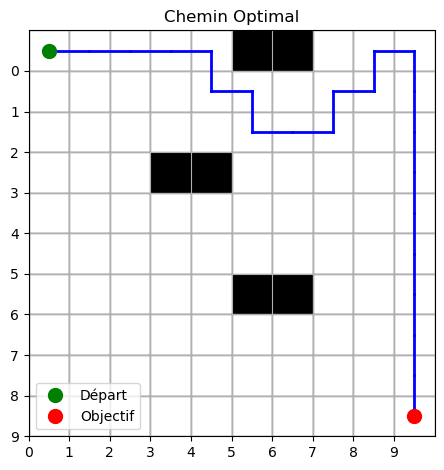

In [98]:
# Création des sous-graphiques
fig, ax = plt.subplots()

# Chemin optimal
visualize_path(ax,env, optimal_path, "Chemin Optimal")
plt.tight_layout()
plt.show()

In [99]:
# Fonction pour visualiser les valeurs Q
def visualize_q_table(Q_table):
    fig, ax = plt.subplots(figsize=(10, 10))
    
    ax.set_xticks(np.arange(Q_table.shape[1] + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(Q_table.shape[0] + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="black", linestyle="-", linewidth=0.5)
    ax.tick_params(which="minor", size=0)
    
    # Dessiner la grille
    ax.imshow(np.zeros(Q_table.shape[:2]), cmap="gray", origin="upper", alpha=0.3)
    
    # Afficher les valeurs Q pour chaque action
    for x in range(Q_table.shape[0]):
        for y in range(Q_table.shape[1]):
            for action, direction in zip(range(4), ["↑", "↓", "←", "→"]):
                dx, dy = [-0.25, 0.25, 0, 0], [0, 0, -0.25, 0.25]  # Position des actions dans chaque case
                ax.text(
                    y + dy[action],
                    x + dx[action],
                    f"{Q_table[x, y, action]:.1f}",
                    ha="center",
                    va="center",
                    fontsize=8,
                    color="blue"
                )
    
    ax.set_xticks(range(Q_table.shape[1]))
    ax.set_yticks(range(Q_table.shape[0]))
    ax.set_xticklabels(range(Q_table.shape[1]))
    ax.set_yticklabels(range(Q_table.shape[0]))
    ax.set_title("Table Q (Valeurs pour chaque Action)")
    plt.show()


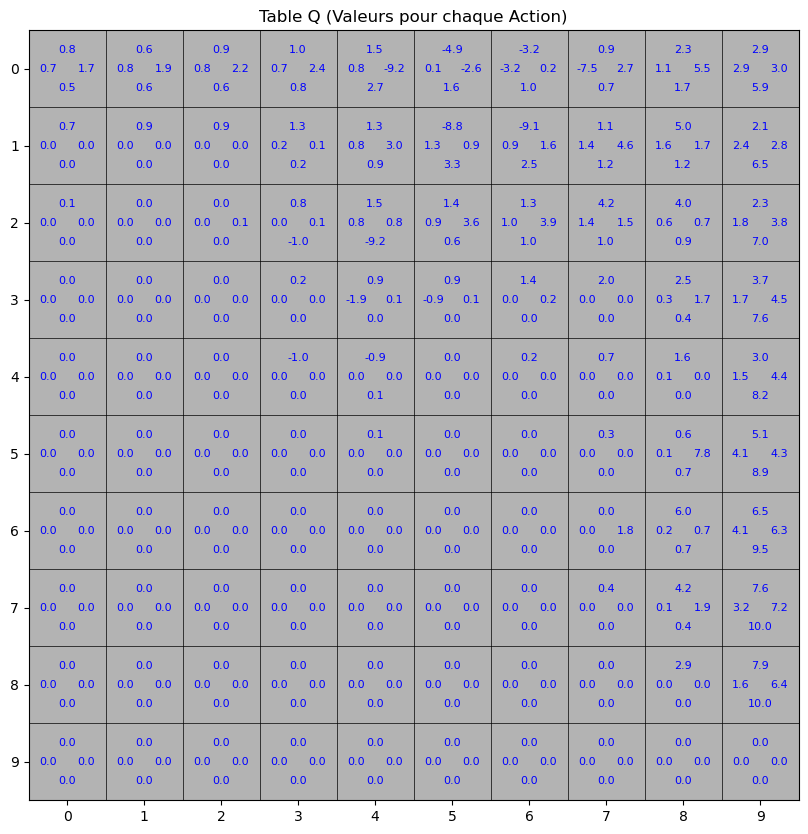

In [100]:
visualize_q_table(q_table)

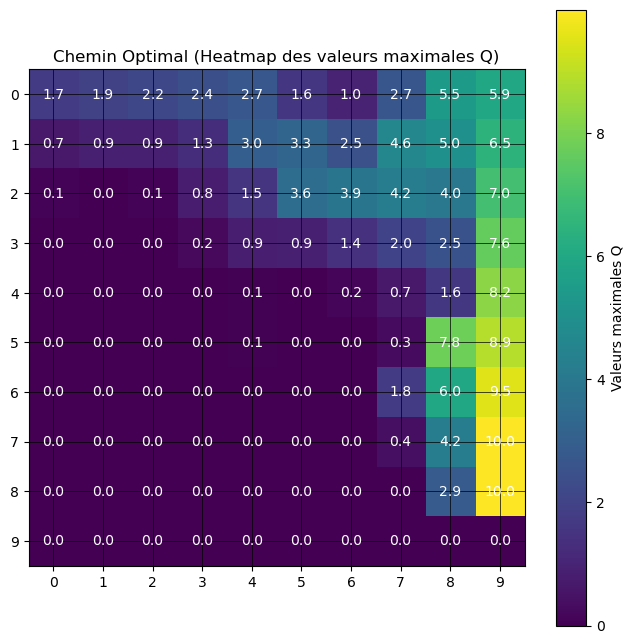

In [101]:
# Fonction pour visualiser les valeurs optimales (max(Q))
def visualize_optimal_path(Q_table):
    # Calculer les valeurs maximales de Q pour chaque état
    optimal_values = np.max(Q_table, axis=2)
    
    # Créer une heatmap pour représenter les valeurs maximales
    plt.figure(figsize=(8, 8))
    plt.imshow(optimal_values, cmap="viridis", origin="upper", interpolation="none")
    
    # Afficher les valeurs dans chaque cellule
    for x in range(optimal_values.shape[0]):
        for y in range(optimal_values.shape[1]):
            plt.text(y, x, f"{optimal_values[x, y]:.1f}", ha="center", va="center", color="white")
    
    plt.title("Chemin Optimal (Heatmap des valeurs maximales Q)")
    plt.colorbar(label="Valeurs maximales Q")
    plt.xticks(range(optimal_values.shape[1]))
    plt.yticks(range(optimal_values.shape[0]))
    plt.grid(color='black', linestyle='-', linewidth=0.5)
    plt.show()

# Visualiser la heatmap des valeurs optimales
visualize_optimal_path(q_table)


## Integration de UI avec pygame

In [ ]:
import pygame

# Initialiser Pygame
pygame.init()

# Paramètres UI
cell_size = 50
screen = pygame.display.set_mode((grid_size * cell_size, grid_size * cell_size))
pygame.display.set_caption("Q-learning Pathfinding")

# Couleurs
colors = {
    0: (255, 255, 255),  # Blanc (case vide)
    1: (0, 0, 0),        # Noir (obstacle)
    2: (255, 0, 0),      # Rouge (fraise)
    'robot': (0, 255, 0),# Vert (robot)
    'goal': (0, 0, 255)  # Bleu (objectif)
}

# Dessiner la grille
def draw_grid(robot_position):
    for x in range(grid_size):
        for y in range(grid_size):
            color = colors[env[x, y]]
            pygame.draw.rect(screen, color, (y * cell_size, x * cell_size, cell_size, cell_size))
            pygame.draw.rect(screen, (200, 200, 200), (y * cell_size, x * cell_size, cell_size, cell_size), 1)
    
    # Dessiner le robot et l'objectif
    pygame.draw.rect(screen, colors['robot'], (robot_position[1] * cell_size, robot_position[0] * cell_size, cell_size, cell_size))
    pygame.draw.rect(screen, colors['goal'], ((9) * cell_size, (9) * cell_size, cell_size, cell_size))

# Boucle principale
running = True
robot_position = (0, 0)
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
    
    screen.fill((255, 255, 255))
    draw_grid(robot_position)
    pygame.display.flip()
    
    # Déplacer le robot
    action_index = np.argmax(q_table[robot_position[0], robot_position[1], :])
    robot_position = take_action(robot_position, actions[action_index])
    pygame.time.wait(500)


## Greedy Q learning (cours)

In [10]:
Q = np.zeros((grid_size, grid_size, len(actions))) 

In [ ]:
# Définir les récompenses
def get_reward2(state):
    x, y = state
    if env[x, y] == 1:  # Obstacle
        return -10
    elif (x, y) == (9, 9):  # Objectif
        return 10
    else:
        return 1 / (abs(x - goal[0]) + abs(y - goal[1]) )

# Q-learning
def train_q_algorithm(episodes, Q):
    for episode in range(episodes):
        state = (0, 0)
        while state != (9, 9):
            # Choisir une action
            action_index = np.argmax(Q[state[0], state[1], :])  # Exploitation
            
            action = actions[action_index]
            next_state = take_action(state, action)
            reward = get_reward2(next_state)
            
            # Mettre à jour la Q-valeur
            Q[state[0], state[1], action_index] += reward + gamma * np.max(Q[next_state[0], next_state[1], :])
            print("La state est ",state)
            print("l'entrainement est dans la state de ",Q[state[0], state[1], :])
            
            state = next_state
    return Q
episodes = 10
Q = train_q_algorithm(episodes, Q)
